# Looking for evidence of long-range dependence in time series data

In this notebook, we are going to compute the fractional differencing parameters of a synthetic time series and compare it to the actual value using the variance method.

## The variance method

Let us define a time series $X_i$, of length $N$. We define the corresponding aggregated series:

$X^{\left( m \right)} \left( k \right) = \frac{1}{m} \sum_{i = \left( k - 1 \right) m + 1}^{k m} X_i$

for $k = 1 , 2 , ... , \left[ \frac{N}{m} \right]$

The sample variance of the time series is:

$\widehat{Var} X^{\left( m \right)} = \frac{m}{N} \sum_{k = 1}^{\frac{N}{m}} \left( X^{\left( m \right)} \left( k \right) - \overline{X} \right) ^2$

Then $\widehat{Var} X^{\left( m \right)}$ behaves as $m^{2 d - 1}$ where $d$ is the fractional differencing parameter. If we make a log-log plot of the sample variance $\widehat{Var} X^{\left( m \right)}$ versus the length $m$ of the aggregation window, the result should be a straight line of slope $2 d - 1$.

## The synthetic time series

Using the R package fracdiff, I generated an ARFIMA(0, d, 0) time series with Pareto innovations. The parameters are equal to:

- $d = 0.1$ (fractional differencing parameter)
- $\alpha = 1.5$ (shape of the Pareto distribution)

<img src="../data/FARIMA_keep/series_9_2.png" width="600">

## How to use the code

This is to explain what is done in the Python scripts compute_FARIMA.py and draw_FARIMA.py

In [1]:
# Import Python modules
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
# Import the function to compute the fractional differencing parameter
# using the variance method
from test_long_range_parallel import variance

In [3]:
# Directory where to find the synthetic time series
dirname = '../data/FARIMA_keep/'

In [4]:
# List of the names of the files containing the time series
# We look at only one time series to shorten the computation time
files = ['series_9_2']

In [5]:
# List of the actual values of the fractional differencing parameter
# used to make the synthetic time series
true_d = [0.1]

In [6]:
# Aggregation sizes used by the variance method
m = np.array([4, 5, 7, 9, 12, 15, 20, 25, 33, 42, 54, 70, 90, 115, 148, \
    190, 244, 314], dtype=int)

In [7]:
# Compute the fractional differencing parameter
# using the variance method for each of the time series

# Create a directory to store the results
newpath = 'variance' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

# Create a numpy array to store the fractional differencing parameters
d_var = np.zeros(len(files))

# Loop on the time series
for i in range(0, len(files)):
    d_var[i] = variance(dirname, files[i], m)

We plot the results to check whether we actually obtain a straight line.

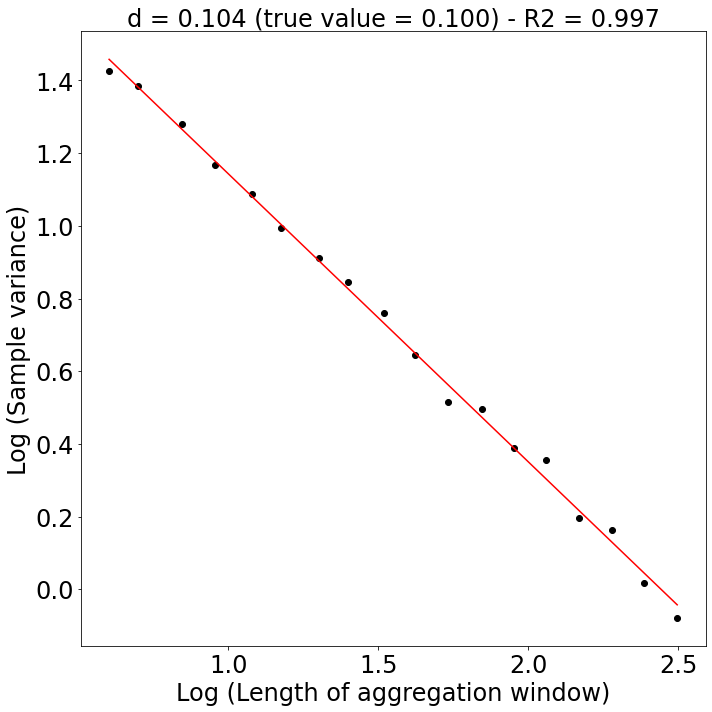

In [8]:
# Load the results of the computation
data = pickle.load(open('variance/' + files[0] + '.pkl', 'rb'))
m = data[0] # Size of the aggregation window
V = data[1] # Corresponding sample variance

# Linear regression of log(sample variance) over log(window size)
x = np.reshape(np.log10(m), (len(m), 1))
y = np.reshape(np.log10(V), (len(V), 1))
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x, y)
y_pred = regr.predict(x)
R2 = r2_score(y, y_pred)

# Estimated value of the fractional differencing parameter
d = 0.5 * (regr.coef_[0][0] + 1)

# Plot
params = {'legend.fontsize': 24, \
          'xtick.labelsize':24, \
          'ytick.labelsize':24}
pylab.rcParams.update(params)
plt.figure(1, figsize=(10, 10))
plt.plot(np.log10(m), np.log10(V), 'ko')
plt.plot(x, y_pred, 'r-')
plt.xlabel('Log (Length of aggregation window)', fontsize=24)
plt.ylabel('Log (Sample variance)', fontsize=24)
plt.title('d = {:.3f} (true value = {:.3f}) - R2 = {:.3f}'. \
    format(d, true_d[0], R2), fontsize=24)
plt.tight_layout()
plt.show(1)

The log-log plot of the sample variance $\widehat{Var} X^{\left( m \right)}$ versus the length $m$ of the aggregation window is indeed close to a straight line.

The computed value of the fractional differencing parameter is close to the actual value.